In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from glob import glob
import os
os.makedirs("Images", exist_ok=True)

In [3]:
old = [path for path in glob("./*.pickle") if 'timing' in path and 'dev' not in path]
new = [path for path in glob("./*.pickle") if 'timing' in path and 'dev' in path]

In [4]:
old

['.\\reference_results_2.18.0.0timing_0.pickle',
 '.\\reference_results_2.18.0.0timing_1.pickle']

In [5]:
new

['.\\reference_results_2.18.0.1.devtiming_0.pickle',
 '.\\reference_results_2.18.0.1.devtiming_1.pickle']

In [6]:
dfs = []
for path in old:
    with open(path, "rb") as f:
        data = pickle.load(f)
    df = pd.DataFrame.from_dict(data).T.reset_index()
    df.rename(columns={'level_0' : 'N', 
                       'level_1' : 'M', 
                       0 : 'permuted',
                       1 : 'not_permuted', 
                       2 : 'ndarray'},
              inplace=True)
    dfs.append(df)
df_old = pd.concat(dfs)

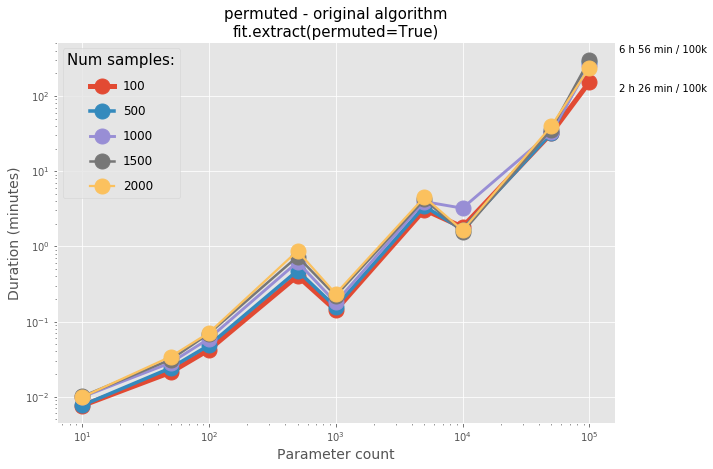

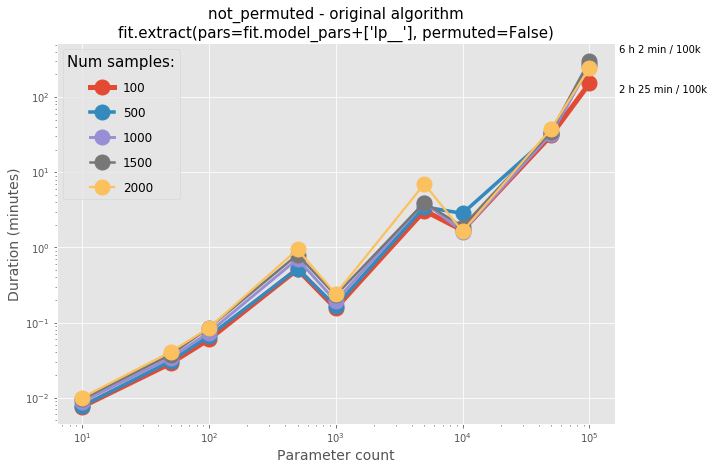

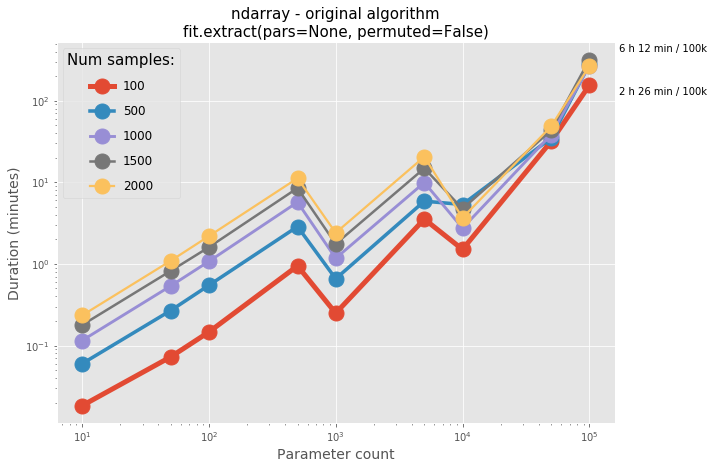

In [7]:
df = df_old
examples = [
    'fit.extract(permuted=True)',
    "fit.extract(pars=fit.model_pars+['lp__'], permuted=False)",
    'fit.extract(pars=None, permuted=False)',
    
]
old_2000 = {}
old_100 = {}
for method, example in zip(['permuted', 'not_permuted', 'ndarray'], examples):
    min_h, max_h = df[df.N == 100_000].min()[method], df[df.N ==100_000].max()[method]
    fig = plt.figure(figsize=(10,7))
    ax = fig.gca()
    for i, (group, df_) in enumerate(df.groupby("M"), 1):
        df_ = df_.groupby('N').mean().reset_index().sort_values(by='N')
        if group == 2000:
            old_2000[method] = df_
        if group == 100:
            old_100[method] = df_
        ax.plot(df_.N, df_[method]/60, label=group, lw=5/np.sqrt(i), marker='o', markersize=15)
    
    ax.text(170_000, max_h/60, f"{max_h/3600:.0f} h {max_h/60%60:.0f} min / 100k", verticalalignment='bottom')
    ax.text(170_000, min_h/60, f"{min_h/3600:.0f} h {min_h/60%60:.0f} min / 100k", verticalalignment='top')
    
    ax.legend(title='Num samples:', labelspacing=1, fontsize=12, title_fontsize=15)
    ax.set_ylabel("Duration (minutes)", fontsize=14)
    ax.set_xlabel("Parameter count", fontsize=14)
    ax.set_title(f"{method} - original algorithm\n{example}", fontsize=15)
    ax.set_yscale('log')
    ax.set_xscale('log')
    fig.savefig(f"./Images/timing_pystan_old_{method}", bbox_inches='tight', dpi=100)

In [8]:
dfs = []
for path in new:
    with open(path, "rb") as f:
        data = pickle.load(f)
    df = pd.DataFrame.from_dict(data).T.reset_index()
    df.rename(columns={'level_0' : 'N', 
                       'level_1' : 'M', 
                       0 : 'permuted',
                       1 : 'not_permuted', 
                       2 : 'ndarray'},
              inplace=True)
    dfs.append(df)
df_new = pd.concat(dfs)

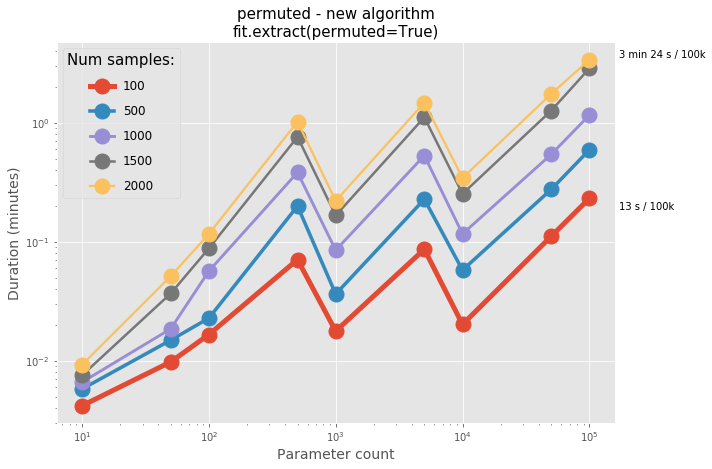

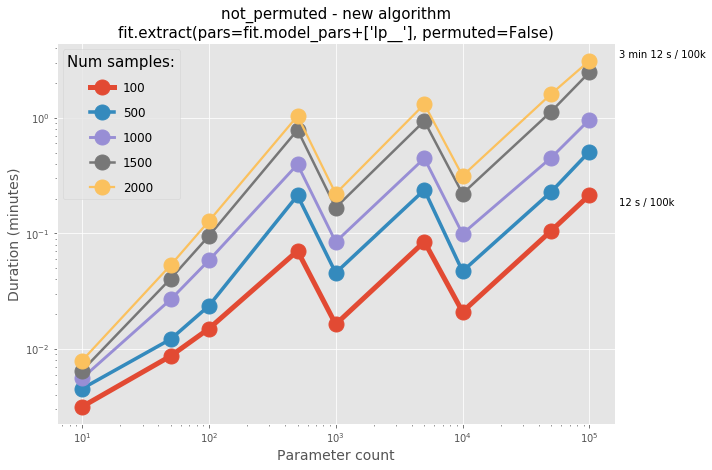

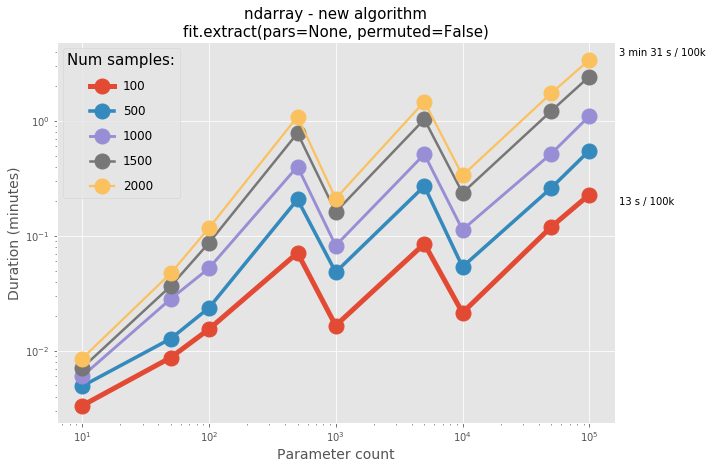

In [9]:
df = df_new
examples = [
    'fit.extract(permuted=True)',
    "fit.extract(pars=fit.model_pars+['lp__'], permuted=False)",
    'fit.extract(pars=None, permuted=False)',
    
]
new_2000 = {}
new_100 = {}
for method, example in zip(['permuted', 'not_permuted', 'ndarray'], examples):
    min_h, max_h = df[df.N == 100_000].min()[method], df[df.N ==100_000].max()[method]
    fig = plt.figure(figsize=(10,7))
    ax = fig.gca()
    for i, (group, df_) in enumerate(df.groupby("M"), 1):
        df_ = df_.groupby('N').mean().reset_index().sort_values(by='N')
        if group == 2000:
            new_2000[method] = df_
        if group == 100:
            new_100[method] = df_
        ax.plot(df_.N, df_[method]/60, label=group, lw=5/np.sqrt(i), marker='o', markersize=15)
    
    ax.text(170_000, max_h/60, f"{max_h//60:.0f} min {max_h%60:.0f} s / 100k", verticalalignment='bottom')
    if min_h//60 == 0:
        ax.text(170_000, min_h/60, f"{min_h%60:.0f} s / 100k", verticalalignment='top')
    else:
        ax.text(170_000, min_h/60, f"{min_h//60:.0f} min {min_h%60:.0f} s / 100k", verticalalignment='top')
    
    ax.legend(title='Num samples:', labelspacing=1, fontsize=12, title_fontsize=15)
    ax.set_ylabel("Duration (minutes)", fontsize=14)
    ax.set_xlabel("Parameter count", fontsize=14)
    ax.set_title(f"{method} - new algorithm\n{example}", fontsize=15)
    ax.set_yscale('log')
    ax.set_xscale('log')
    fig.savefig(f"./Images/timing_pystan_new_{method}", bbox_inches='tight', dpi=100)

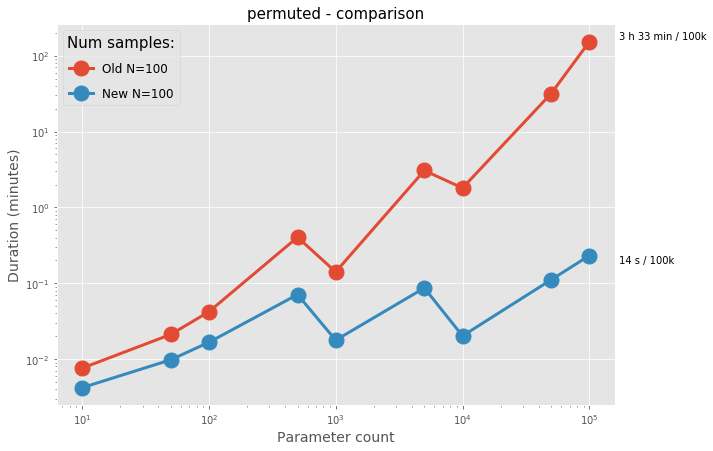

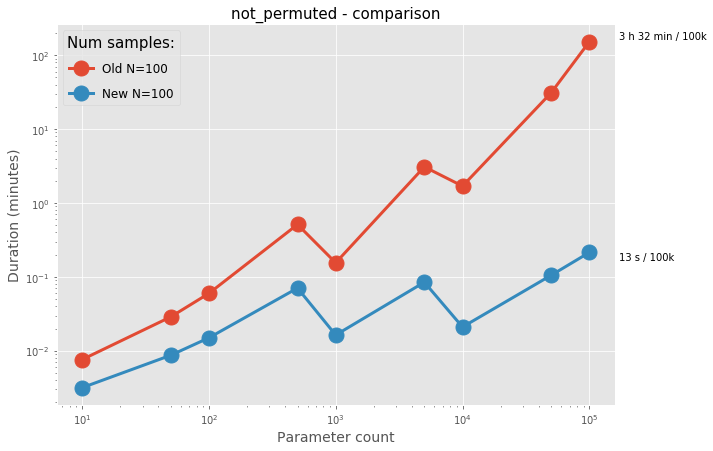

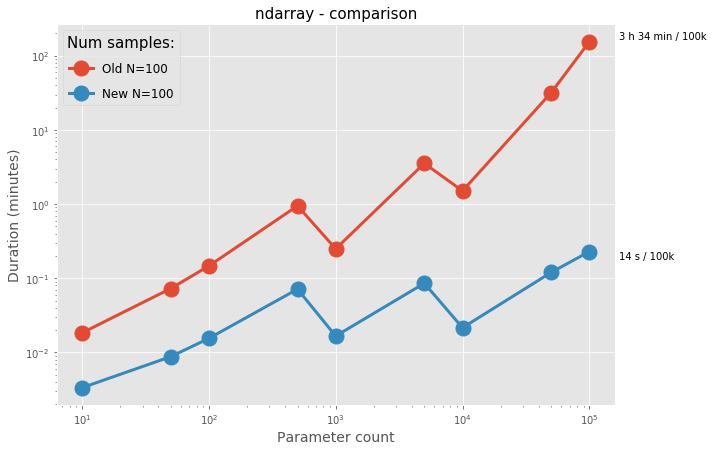

In [10]:
for method, old_ in old_100.items():
    new_ = new_100[method]
    min_h, max_h = new_.max()[method], old_.max()[method]
    fig = plt.figure(figsize=(10,7))
    ax = fig.gca()
    ax.plot(old_.N, old_[method]/60, label=f"Old N=100", lw=3, marker='o', markersize=15)
    ax.plot(new_.N, new_[method]/60, label=f"New N=100", lw=3, marker='o', markersize=15)
    ax.legend(title='Num samples:', labelspacing=1, fontsize=12, title_fontsize=15)
    
    ax.text(170_000, max_h/60, f"{max_h/3600:.0f} h {max_h/60%60:.0f} min / 100k", verticalalignment='bottom')
    if min_h//60 == 0:
        ax.text(170_000, min_h/60, f"{min_h%60:.0f} s / 100k", verticalalignment='top')
    else:
        ax.text(170_000, min_h/60, f"{min_h//60:.0f} min {min_h%60:.0f} s / 100k", verticalalignment='top')
    ax.set_ylabel("Duration (minutes)", fontsize=14)
    ax.set_xlabel("Parameter count", fontsize=14)
    ax.set_title(f"{method} - comparison", fontsize=15)
    ax.set_yscale('log')
    ax.set_xscale('log')
    fig.savefig(f"./Images/timing_pystan_comparison_100_{method}", bbox_inches='tight', dpi=100)

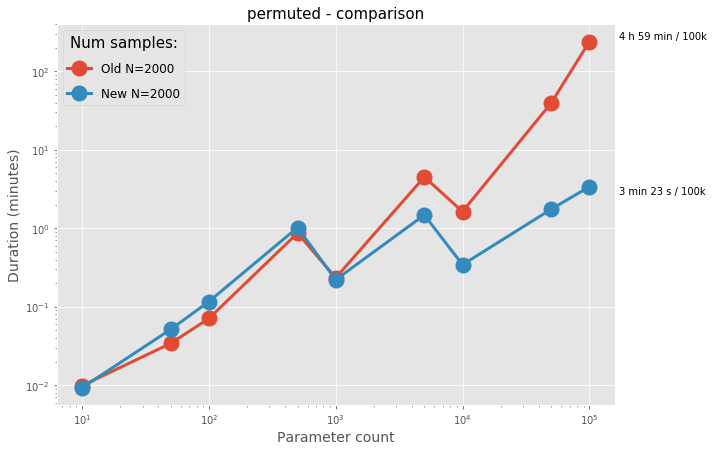

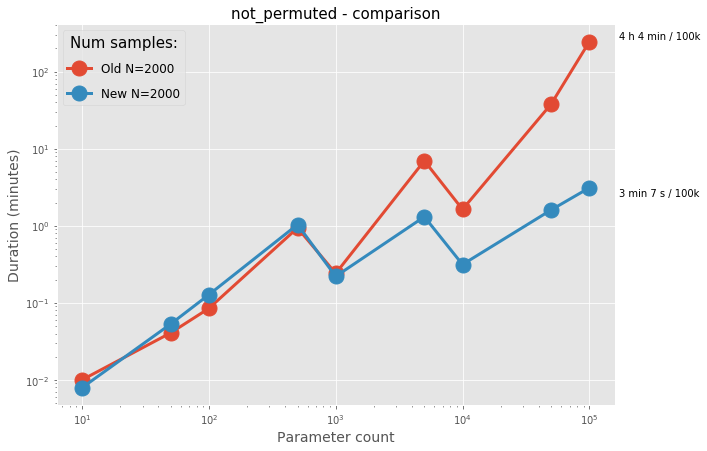

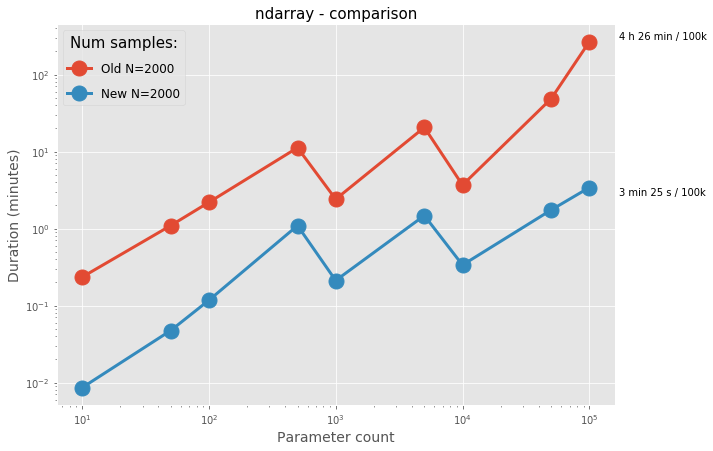

In [11]:
for method, old_ in old_2000.items():
    new_ = new_2000[method]
    min_h, max_h = new_.max()[method], old_.max()[method]
    fig = plt.figure(figsize=(10,7))
    ax = fig.gca()
    ax.plot(old_.N, old_[method]/60, label=f"Old N=2000", lw=3, marker='o', markersize=15)
    ax.plot(new_.N, new_[method]/60, label=f"New N=2000", lw=3, marker='o', markersize=15)
    ax.legend(title='Num samples:', labelspacing=1, fontsize=12, title_fontsize=15)
    
    ax.text(170_000, max_h/60, f"{max_h/3600:.0f} h {max_h/60%60:.0f} min / 100k", verticalalignment='bottom')
    if min_h//60 == 0:
        ax.text(170_000, min_h/60, f"{min_h%60:.0f} s / 100k", verticalalignment='top')
    else:
        ax.text(170_000, min_h/60, f"{min_h//60:.0f} min {min_h%60:.0f} s / 100k", verticalalignment='top')
    ax.set_ylabel("Duration (minutes)", fontsize=14)
    ax.set_xlabel("Parameter count", fontsize=14)
    ax.set_title(f"{method} - comparison", fontsize=15)
    ax.set_yscale('log')
    ax.set_xscale('log')
    fig.savefig(f"./Images/timing_pystan_comparison_2000_{method}", bbox_inches='tight', dpi=100)

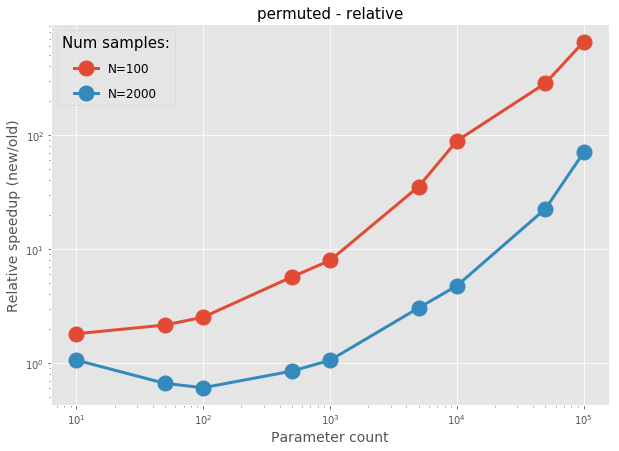

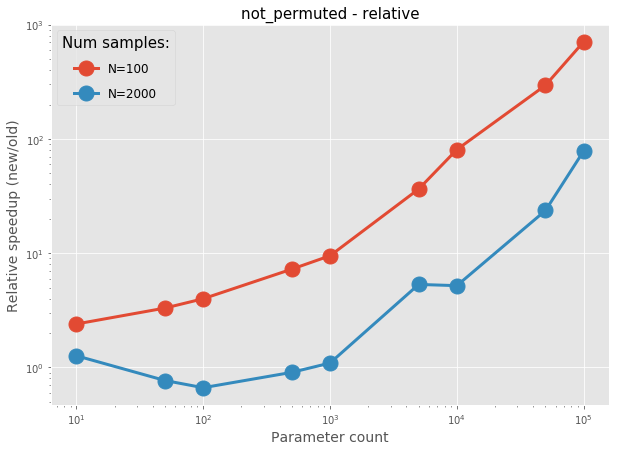

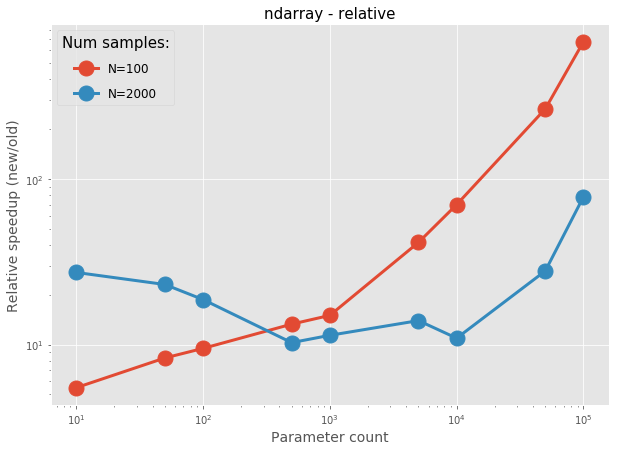

In [12]:
for method, old_100_ in old_100.items():
    new_100_ = new_100[method]
    old_2000_ = old_2000[method]
    new_2000_ = new_2000[method]
    
    fig = plt.figure(figsize=(10,7))
    ax = fig.gca()
    
    ax.plot(old_100_.N, (old_100_[method]/new_100_[method]), label='N=100', lw=3, marker='o', markersize=15)
    ax.plot(old_100_.N, (old_2000_[method]/new_2000_[method]), label='N=2000', lw=3, marker='o', markersize=15)
    ax.legend(title='Num samples:', labelspacing=1, fontsize=12, title_fontsize=15)
    
    ax.set_ylabel("Relative speedup (new/old)", fontsize=14)
    ax.set_xlabel("Parameter count", fontsize=14)
    ax.set_title(f"{method} - relative", fontsize=15)
    ax.set_yscale('log')
    ax.set_xscale('log')
    fig.savefig(f"./Images/timing_pystan_relative_{method}", bbox_inches='tight', dpi=100)